In [1]:
from google.colab import drive
drive.mount( '/content/drive' )

Mounted at /content/drive


In [2]:
import time

**Libarary**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import RepeatedEditedNearestNeighbours
from imblearn.under_sampling import AllKNN
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks

In [5]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

**Train-Test Set**

In [8]:
df_card = pd.read_csv( '/content/drive/MyDrive/학술제 폴더/카드사기 탐지/카드사기 데이터/creditcard.csv')

In [9]:
X, y = df_card.iloc[:,:-1], df_card.iloc[:, -1]

In [10]:
y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
492*100/(284315)

0.17304750013189596

In [12]:
validation_ratio_1 = [ 0.00216, 0.0029, 0.0044, 0.0087]
validation_ratio_2 = [0.0086, 0.017, 0.0865, 0.17]

1,2는 각각 undersampling의 비율과 oversampling의 비율
undersampling 은 다수 클래스에서 0.2 0.4 0.6 0.8만큼 재거한 비율
oversampling은 소수 클래스를 5, 10, 50, 100배 만큼 함

In [13]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [14]:
classifier = [[LogisticRegression(), 'lreg'], [LinearSVC(C=0.001),'svc'], [RandomForestClassifier(max_depth=10),'rdf'], [KNeighborsClassifier(n_neighbors=3), 'knn']]

In [21]:
def Resampler(resampler, ratio):

  sampler = {
      'CC' : ClusterCentroids(sampling_strategy=ratio, random_state=0),
      'CNN': CondensedNearestNeighbour(random_state=0),
      'ENN': EditedNearestNeighbours(),
      'RENN': RepeatedEditedNearestNeighbours(),
      'AKNN': AllKNN(),
      'NCR': NeighbourhoodCleaningRule(),
      'RUS': RandomUnderSampler(sampling_strategy=ratio, random_state=0),
      'TL': TomekLinks,
      'ROS': RandomOverSampler(sampling_strategy=ratio, random_state=0),
      'SMOTE': SMOTE(random_state=0),
      'SVMSMOTE': SVMSMOTE(sampling_strategy=ratio, random_state=0),
  }
  
  return sampler[resampler]

원하는 Sampling을 선택하고 Resampler에 입력해서 돌린다

**UnderSampling**

In [22]:
score = []
time_list = []
for ratio in validation_ratio_1:
  n_iter = 0
  for train_index, test_index in skf.split(X, y):
    n_iter += 1
    start = time.time()
    resampler = Resampler('RUS', ratio)
    X_res, y_res = resampler.fit_resample(X.iloc[train_index], y.iloc[train_index])
    time_list.append(time.time() - start)

    for clf in classifier:
      
      clf[0].fit(X_res, y_res)
      y_pred = clf[0].predict(X.iloc[test_index])
      score.append( [clf[1],ratio, accuracy_score(y_pred,  y.iloc[test_index]), precision_score(y_pred, y.iloc[test_index]),
                       recall_score(y_pred, y.iloc[test_index]), f1_score(y_pred, y.iloc[test_index])] )


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (sta

In [23]:
score

[['lreg',
  0.00216,
  0.9990344440153085,
  0.6868686868686869,
  0.7391304347826086,
  0.7120418848167539],
 ['svc',
  0.00216,
  0.9982971103542713,
  0.020202020202020204,
  1.0,
  0.03960396039603961],
 ['rdf',
  0.00216,
  0.9994908886626171,
  0.7373737373737373,
  0.9605263157894737,
  0.8342857142857143],
 ['knn',
  0.00216,
  0.9984551104244935,
  0.12121212121212122,
  0.9230769230769231,
  0.21428571428571427],
 ['lreg',
  0.00216,
  0.9990519995786665,
  0.7878787878787878,
  0.7027027027027027,
  0.7428571428571429],
 ['svc',
  0.00216,
  0.9983322214809873,
  0.04040404040404041,
  1.0,
  0.07766990291262137],
 ['rdf',
  0.00216,
  0.9995611109160493,
  0.797979797979798,
  0.9404761904761905,
  0.8633879781420766],
 ['knn',
  0.00216,
  0.9985253326779256,
  0.16161616161616163,
  0.9411764705882353,
  0.2758620689655173],
 ['lreg',
  0.00216,
  0.9990168711925703,
  0.6938775510204082,
  0.723404255319149,
  0.7083333333333333],
 ['svc', 0.00216, 0.9982795245869981, 0.

In [24]:
time_list

[0.369922399520874,
 0.3685929775238037,
 0.27469873428344727,
 0.3530607223510742,
 0.29073381423950195,
 0.3261075019836426,
 0.22783970832824707,
 0.2870168685913086,
 0.2161417007446289,
 0.2232663631439209,
 0.1694328784942627,
 0.1717243194580078,
 0.1788489818572998,
 0.17235589027404785,
 0.19159269332885742,
 0.13602185249328613,
 0.13500118255615234,
 0.13986706733703613,
 0.13150882720947266,
 0.13212108612060547]

In [25]:
t1=sum(time_list[0:4])/5
t2=sum(time_list[5:9])/5
t3=sum(time_list[10:14])/5
t4=sum(time_list[15:19])/5
print(t1, t2, t3, t4)

0.2732549667358398 0.21142115592956542 0.13847241401672364 0.10847978591918946


**OverSampling**

**Evaluate**

In [26]:
def score_evaluate(score):
  length = int(len(score))
  score = score.astype(np.float64)
  acc, pre, rec, f1s = [], [], [], []
  for i in range(0,length,5):
    acc.append(score[i:i+5,1].mean())
    pre.append(score[i:i+5,2].mean())
    rec.append(score[i:i+5,3].mean())
    f1s.append(score[i:i+5,4].mean())
  
  return acc, pre, rec, f1s

In [27]:
score = np.array(score)

lreg_score_index = np.where(score == 'lreg')
svc_score_index = np.where(score == 'svc')
rdf_score_index = np.where(score == 'rdf')
knn_score_index = np.where(score == 'knn')
lreg_score = score[lreg_score_index[0]]
svc_score = score[svc_score_index[0]]
rdf_score = score[rdf_score_index[0]]
knn_score = score[knn_score_index[0]]
lreg_score = np.delete(lreg_score,0, axis=1)
svc_score = np.delete(svc_score,0, axis=1)
rdf_score = np.delete(rdf_score,0, axis=1)
knn_score = np.delete(knn_score,0, axis=1)

lreg_acc, lreg_pre, lreg_rec, lreg_f1s = score_evaluate(lreg_score)
svc_acc, svc_pre, svc_rec, svc_f1s = score_evaluate(svc_score)
rdf_acc, rdf_pre, rdf_rec, rdf_f1s = score_evaluate(rdf_score)
knn_acc, knn_pre, knn_rec, knn_f1s = score_evaluate(knn_score)

In [28]:
print('< CNN >')

for i in range(4):
    print('///// 비율 :', validation_ratio_1[i], '/////')
    print('KNN')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(float(knn_score[i,1]), float(knn_score[i,2]), float(knn_score[i,3]), float(knn_score[i,4])))
    print('f1 평균 :', knn_f1s[0])
    print('-----------------------------------------------------------------------')
    print('LinearSVC')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(float(svc_score[i,1]), float(svc_score[i,2]), float(svc_score[i,3]), float(svc_score[i,4])))
    print('f1 평균 :', svc_f1s[0])
    print('-----------------------------------------------------------------------')
    print('RL')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(float(lreg_score[i,1]), float(lreg_score[i,2]), float(lreg_score[i,3]), float(lreg_score[i,4])))
    print('f1 평균 :', lreg_f1s[0])
    print('-----------------------------------------------------------------------')
    print('RF')
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}'.format(float(rdf_score[i,1]), float(rdf_score[i,2]), float(rdf_score[i,3]), float(rdf_score[i,4])))
    print('f1 평균 :', rdf_f1s[0])
    print('-----------------------------------------------------------------------')

< CNN >
///// 비율 : 0.00216 /////
KNN
정확도: 0.9985, 정밀도: 0.1212, 재현율: 0.9231, F1: 0.2143
f1 평균 : 0.18544109007095405
-----------------------------------------------------------------------
LinearSVC
정확도: 0.9983, 정밀도: 0.0202, 재현율: 1.0000, F1: 0.0396
f1 평균 : 0.06502042455402424
-----------------------------------------------------------------------
RL
정확도: 0.9990, 정밀도: 0.6869, 재현율: 0.7391, F1: 0.7120
f1 평균 : 0.7006712770869711
-----------------------------------------------------------------------
RF
정확도: 0.9995, 정밀도: 0.7374, 재현율: 0.9605, F1: 0.8343
f1 평균 : 0.8556959348006148
-----------------------------------------------------------------------
///// 비율 : 0.0029 /////
KNN
정확도: 0.9985, 정밀도: 0.1616, 재현율: 0.9412, F1: 0.2759
f1 평균 : 0.18544109007095405
-----------------------------------------------------------------------
LinearSVC
정확도: 0.9983, 정밀도: 0.0404, 재현율: 1.0000, F1: 0.0777
f1 평균 : 0.06502042455402424
-----------------------------------------------------------------------
RL
정확도: 0.9

array안의 데이터를 이용해서 plot을 그린다

**Visualize**

Undersampler

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'result'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'result'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Unrecognized location 'result'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3

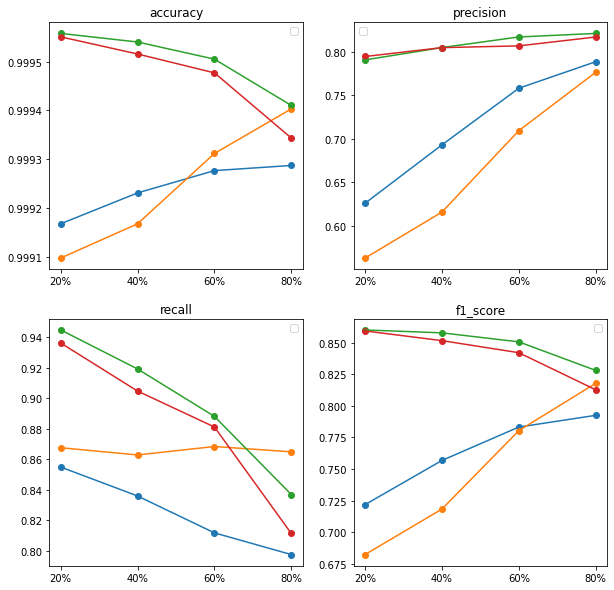

In [ ]:
acc = [lreg_acc, svc_acc, rdf_acc, knn_acc]
pre = [lreg_pre, svc_pre, rdf_pre, knn_pre]
rec = [lreg_rec, svc_rec, rdf_rec, knn_rec]
f1s = [lreg_f1s, svc_f1s, rdf_f1s, knn_f1s]
result = [acc, pre, rec, f1s]
result = np.array(result)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

x_row1 = ['20%', '40%', '60%', '80%']
x_row2 = ['5', '10', '50', '100']
plt_name= ['accuracy', 'precision', 'recall', 'f1_score']

i = 0
for a in range(len(ax)): 
    for b in range(len(ax[a])):
        subplot_title = plt_name[i]
        ax[a,b].set_title(subplot_title)
        ax[a,b].legend(loc='result')
        ax[a,b].plot(x_row1, result[i][0])
        ax[a,b].plot(x_row1, result[i][1])
        ax[a,b].plot(x_row1, result[i][2])
        ax[a,b].plot(x_row1, result[i][3])
        ax[a,b].scatter(x_row1, result[i][0])
        ax[a,b].scatter(x_row1, result[i][1])
        ax[a,b].scatter(x_row1, result[i][2])
        ax[a,b].scatter(x_row1, result[i][3])
        i=i+1

plt.show()

OverSampler

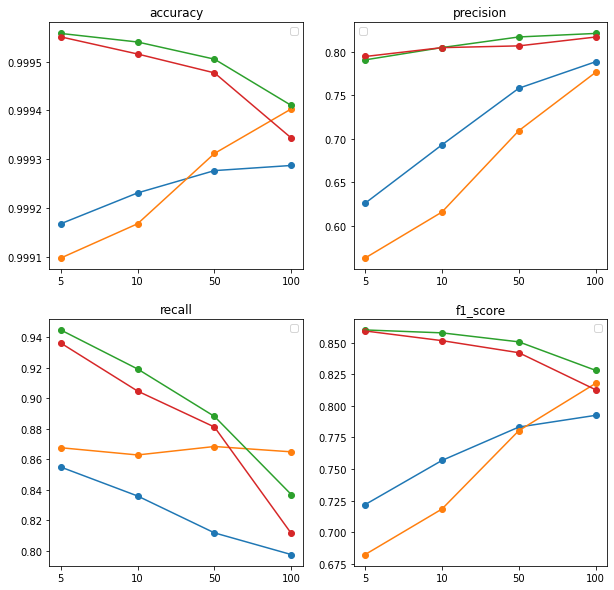

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

x_row1 = ['20%', '40%', '60%', '80%']
x_row2 = ['5', '10', '50', '100']
plt_name= ['accuracy', 'precision', 'recall', 'f1_score']

i = 0
for a in range(len(ax)): 
    for b in range(len(ax[a])):
        subplot_title = plt_name[i]
        ax[a,b].set_title(subplot_title)
        ax[a,b].legend(loc='best')
        ax[a,b].plot(x_row2, result[i][0])
        ax[a,b].plot(x_row2, result[i][1])
        ax[a,b].plot(x_row2, result[i][2])
        ax[a,b].plot(x_row2, result[i][3])
        ax[a,b].scatter(x_row2, result[i][0])
        ax[a,b].scatter(x_row2, result[i][1])
        ax[a,b].scatter(x_row2, result[i][2])
        ax[a,b].scatter(x_row2, result[i][3])
        i=i+1

plt.show()